### Importing the required libraries

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuray_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Loading the dataset 

In [81]:
data = pd.read_csv(r'C:\Users\Thinkpad\Downloads\Meriskill\Project 2 Diabetes Data\diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Checking the Missing values 

<Axes: >

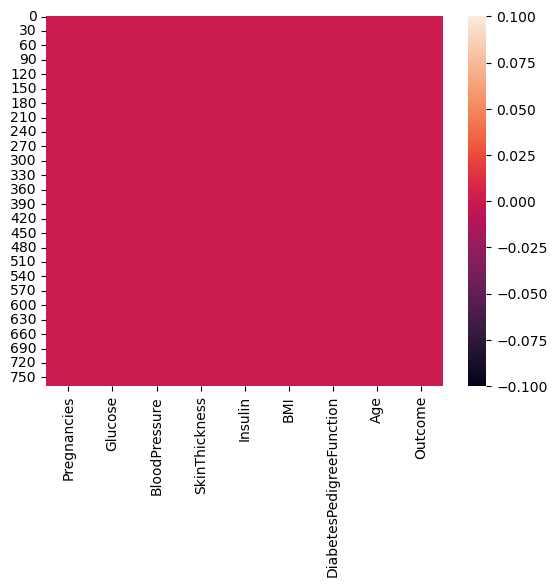

In [83]:
sns.heatmap(data.isnull())

### Co relation matrix

In [84]:
correlation = data.corr()

print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

### Heat Map

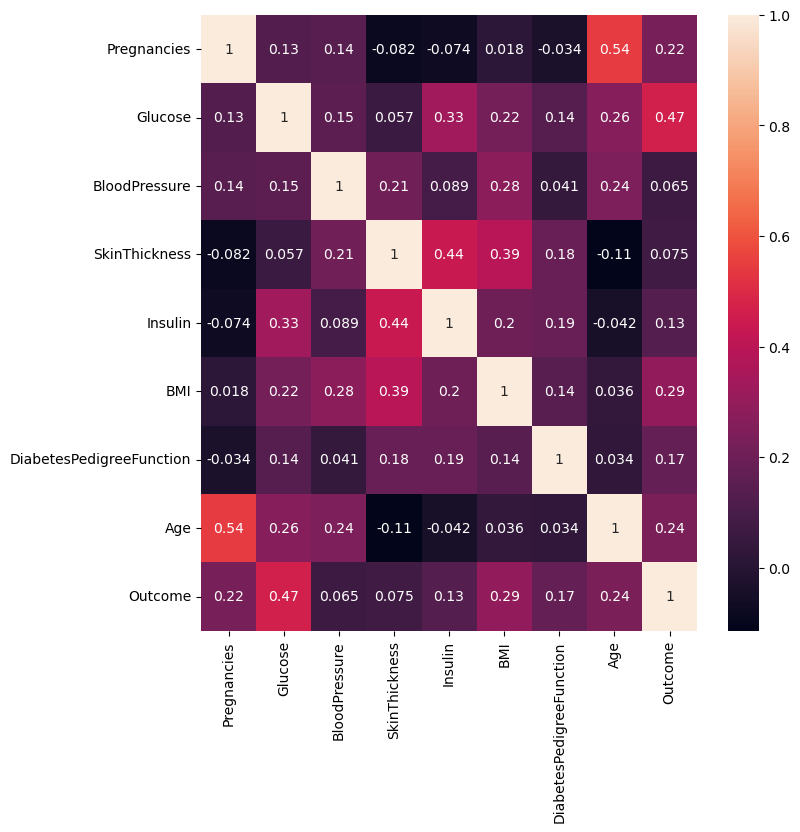

In [86]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot = True)
plt.show()

### TRAINING THE MODEL WITH THE HELP OF TRAIN TEST SPLIT

###  Train test split

In [97]:
# Split the data into dependent and independent variables
x = data.drop('Outcome', axis = 1)
y = data['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [98]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

###  Training the Logistic Regression Model

In [99]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# fit the model on the train set
model.fit(x_train, y_train)

LogisticRegression()

### Making Prediction

In [100]:
# Predict on x_test
prediction = model.predict(x_test)

print(prediction)

[1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0]


### Calculating Accuracy

In [101]:
# Evaluate the model

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction, y_test)

print(accuracy)

0.7987012987012987
